#Iris flower classification



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Mount file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import file
iris_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/book2_dataset_iris.csv', encoding ='utf-8')

#1. Exploratory data analysis

In [ ]:
#Display the first few rows
print(iris_data.head())

   Id  Sepal.length  Sepal.width  Petal.length  Petal.width Species
0   1           5.1          3.5           1.4          0.2  Setosa
1   2           4.9          3.0           1.4          0.2  Setosa
2   3           4.7          3.2           1.3          0.2  Setosa
3   4           4.6          3.1           1.5          0.2  Setosa
4   5           5.0          3.6           1.4          0.2  Setosa


In [ ]:
#Display the structure
print(iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal.length  150 non-null    float64
 2   Sepal.width   150 non-null    float64
 3   Petal.length  150 non-null    float64
 4   Petal.width   150 non-null    float64
 5   Species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
#Summary statistics
print(iris_data.describe())

               Id  Sepal.length  Sepal.width  Petal.length  Petal.width
count  150.000000    150.000000   150.000000    150.000000   150.000000
mean    75.500000      5.843333     3.057333      3.758000     1.199333
std     43.445368      0.828066     0.435866      1.765298     0.762238
min      1.000000      4.300000     2.000000      1.000000     0.100000
25%     38.250000      5.100000     2.800000      1.600000     0.300000
50%     75.500000      5.800000     3.000000      4.350000     1.300000
75%    112.750000      6.400000     3.300000      5.100000     1.800000
max    150.000000      7.900000     4.400000      6.900000     2.500000


In [ ]:
#Checking for missing values
print(iris_data.isnull().sum())

Id              0
Sepal.length    0
Sepal.width     0
Petal.length    0
Petal.width     0
Species         0
dtype: int64


In [ ]:
#Drop the 'Id' column as it is not useful for classification
iris_data.drop(columns=['Id'], inplace=True)

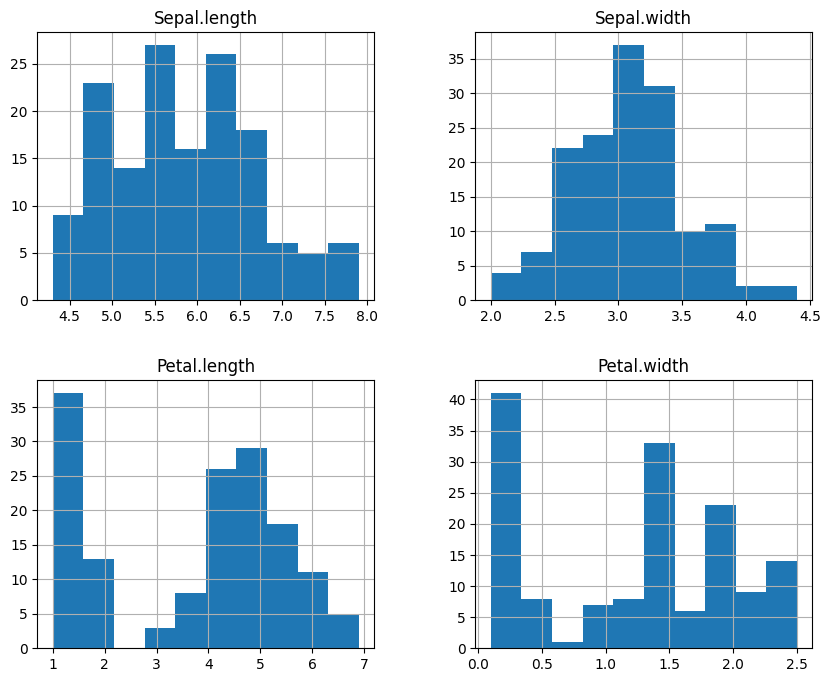

In [ ]:
#Histograms
iris_data.hist(figsize=(10, 8))
plt.show()

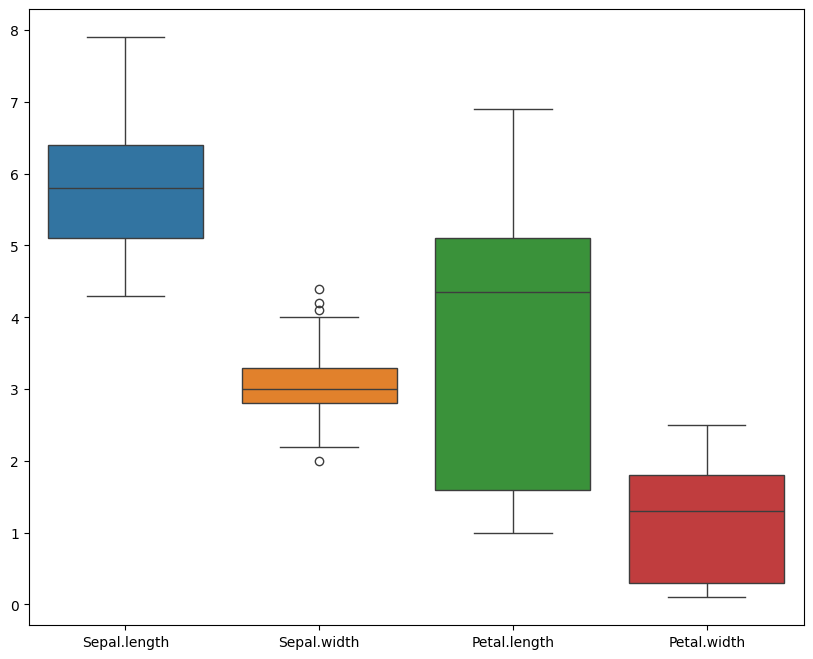

In [ ]:
#Box plots
plt.figure(figsize=(10, 8))
sns.boxplot(data=iris_data)
plt.show()

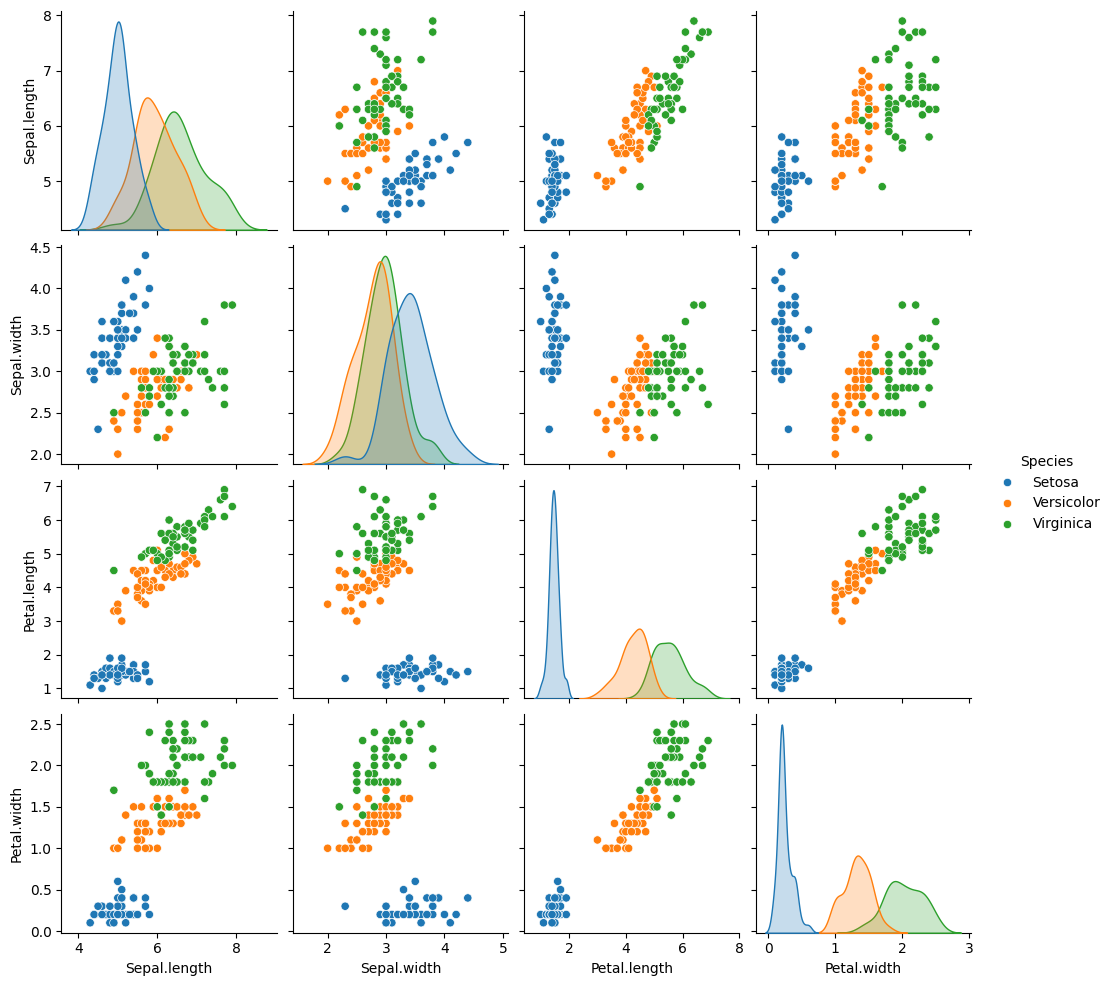

In [ ]:
#Pair plot
sns.pairplot(iris_data, hue='Species')
plt.show()


#Insights and Observations

Based on the above analysis, derive key insights and observations:

Histogram
1. The bimodal distributions in petal length and petal width suggest that these features can effectively differentiate between the species in the Iris dataset.
2. Sepal length and width have more continuous distributions but still show some patterns that could help in classification.
3. The presence of distinct clusters in petal length and width indicates that these features might be more significant in distinguishing between the species.

Box plot
1. Comparison of Spreads: Petal length and petal width exhibit more spread (higher variability) compared to sepal length and sepal width, as evidenced by their wider IQRs.
2. Outliers: Sepal width has the most noticeable outliers, indicating some observations significantly deviating from the central tendency.
3. Median Values: The median values across the features highlight the central tendency, with petal measurements showing more diversity compared to sepal measurements.
4. Symmetry and Skewness: Most features exhibit a relatively symmetric distribution, except for slight skewness in petal length and sepal width.

Pair plot

Setosa: Easily distinguishable from Versicolor and Virginica using most combinations of the variables, especially those involving petal length and petal width.
Versicolor and Virginica: While they show some overlap in most features, they can still be separated using combinations involving petal measurements more effectively than sepal measurements.

#2. The iris data set contains 4 input features and 1 output variable (the class label).

In [ ]:
#Identify the feature names (excluding the target variable 'Species')
feature_names = iris_data.columns[:-1].tolist()

In [ ]:
#Input features
print("Feature Names:", feature_names)

Feature Names: ['Sepal.length', 'Sepal.width', 'Petal.length', 'Petal.width']


In [ ]:
#Identify the target names ('Species')
target_names = iris_data.columns[-1]

In [ ]:
#Extract unique target names (species)
target_names = iris_data[target_names].unique()

In [ ]:
#Output features
print("target_names:", target_names)

target_names: ['Setosa' 'Versicolor' 'Virginica']


#3. Look the data


In [ ]:
#Convert the DataFrame to a Numpy array
iris_array = iris_data.values

In [ ]:
iris_array_no_species = iris_array[:, :-1]

In [ ]:
#Display the array
print(iris_array_no_species)

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#4. Output variable (Class label)

In [ ]:
#Extract the class labels
class_labels = iris_data.iloc[:, -1]

In [ ]:
#Convert the class labels to numeric values
#Create a mapping for the class labels
label_mapping = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
numeric_labels = class_labels.map(label_mapping)

In [ ]:
#Convert to a NumPy array
iris_labels_array = numeric_labels.values

In [ ]:
print(iris_labels_array)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#5. Assigning input and output variables


In [ ]:
#Let's assign the 4 input variables to X and the output variable (class label) to Y
X = iris_array_no_species
Y = iris_labels_array

#6. Examine the data dimension


In [ ]:
X.shape

(150, 4)

In [ ]:
Y.shape

(150,)

#7. Build classification model using Random forest

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X, Y)

RandomForestClassifier()

#8. Feature importance

In [ ]:
print(clf.feature_importances_)

[0.12701983 0.02436033 0.37982224 0.4687976 ]


#9. Make prediction

In [ ]:
X[0]

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [ ]:
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [ ]:
print(clf.predict(X[[0]]))

[0]


In [ ]:
print(clf.predict_proba(X[[0]]))

[[1. 0. 0.]]


In [ ]:
clf.fit(iris_array_no_species, target_names[iris_labels_array])

RandomForestClassifier()

#10. Data split

In [ ]:
#Split the data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((120, 4), (120,))

In [ ]:
X_test.shape, Y_test.shape

((30, 4), (30,))

#11. Rebuild the Random forest model

In [ ]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

#11.1 Performs prediction on single sample from the data set

In [ ]:
print(clf.predict([[5.1, 3.5, 1.4, 0.2]]))

[0]


In [ ]:
print(clf.predict_proba([[5.1, 3.5, 1.4, 0.2]]))

[[1. 0. 0.]]


#11.2 Performs prediction on the test set

In [ ]:
#Predict class label
print(clf.predict(X_test))

[0 0 0 0 0 1 0 1 0 2 0 1 0 0 0 0 1 1 1 2 2 0 2 1 2 0 0 0 1 1]


In [ ]:
#Actual class labels
print(Y_test)

[0 0 0 0 0 1 0 1 0 2 0 1 0 0 0 0 1 1 1 2 2 0 1 1 1 0 0 0 1 2]


#Model Performance

In [ ]:
print(clf.score(X_test, Y_test))

0.9


In [ ]:
print('Classification Report:')
print(classification_report(Y_test, clf.predict(X_test), target_names=['Setosa', 'Versicolor', 'Virginica']))

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.89      0.80      0.84        10
   Virginica       0.60      0.75      0.67         4

    accuracy                           0.90        30
   macro avg       0.83      0.85      0.84        30
weighted avg       0.91      0.90      0.90        30

